This file is a set of custom snippets intended for use in the pullout menu at the left of CoLab. Clicking on the `<>` tab on the left opens a standard set of 'snippets' or code bits which can serve as starting points for common tasks. These are intended for my class and can be customized. Students are encouraged to put the link to this file in their snippets list by pasting the URL into the appropriate location in their 'Settings' control panel.

Students can also make their own and simply add their version in addition to these:
  - Start each snippet with an H1 header (one `#`) and a title. *To make it easy to find start with some special characters (your initials?)*
  - Follow the title with a text cell of instructions.
  - Follow the instructions with a code cell with your snippet. *Be sure to use lots of comments so you know what you can and should change.*

Note: $\LaTeX$ doesn't work in the snippet area but small illustrations do.  

# APC: General Libraries

This is the basic toolset we use in our class.  You'll want to put this near the top of your notebook. 

In [ ]:
#@title Basic Libraries
# First the usual imports:
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

#APC: Pint Import


Dimensional calculations within python. numpy arrays and matplot lib coexists with this library well but we first have to download the library into our virtual machine.

In [ ]:
#@title Pint (units and uncertainties)
# The following lines look complicated but are there if you need to re-load the libraries
# it will take less time if the libraries we want are 'installed' already.
try:  # if we have already imported the library then this works.
    import pint
    SI = pint.UnitRegistry(system="mks")  # loads the default SI units
except:  # if we haven't installed it yet, this installs and loads it
    !pip install -q --upgrade pint # handles units with our calculations
    !pip install -q --upgrade uncertainties # allows us to create numbers with error bars OPTIONAL
    import pint
    SI = pint.UnitRegistry(system="mks")  # loads the default SI units


# APC: Plot of data points

Plots of experimental values, $x$ vs $t$ or $y$ vs $x$ for example should be rendered as discrete points on a graph without connecting lines.  We sample at specific times or positions we don't want to draw conclusions about places we haven't measured.

Assumptions:
  - You have loaded the libraries under the heading 'General Library' (*you only have to do this once per notebook*)
  - You have a small number of discrete values to plot

In [ ]:
#
# Next we run the following lines of code:
t = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
x = np.array([0.0, 0.0017, 0.0068, 0.0153, 0.0272, 0.0425, 0.0612, 0.0833,0.1088, 0.1377])

# begin the plot process...
# 4 styles  (there are many more; look them up)
#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')
#plt.style.use('ggplot')
plt.style.use('classic')

# plot the points  c is the color, you can make multiple plots
#  in a single frame and give them different labels and colors
#  the following plots using (g)reen points and gives this set a lablel 'x plot'
plt.scatter(t, x, c="g", label="x plot")
# repeat the above line to include other datasets to be presented on the same graph

# label the axes and graph
plt.xlabel("time [s]")
plt.ylabel("x pos [m]")
plt.title("Time Graphs")

# put up a legend
plt.legend(loc="upper left")  # has to appear after we plot. (may need to change location e.g. "lower right")
plt.grid(True) # helps us visualize and interpolate data.

# show it.
plt.show()

# APC: Plot of a function


Plotting models or fits are done using continuous lines.  Functions are 'models' that are intended to reflect a relationship between input and output and are meant to "fill in the gaps" between measurements.

Assumptions:
  - You have loaded the libraries under the heading 'General Library' (*you only have to do this once per notebook*)
  - functional model you wish to display

In [ ]:

t = np.arange(0.0,1.0,0.1)   # 10 values between 0.0 and 1.0 seconds
# direct calculation
x = 1/2 * 0.34 * t**2  # an acceleration of 0.34 m/s^2 OR 
# define a function
def xf(t):
  return 1/2 * 0.54 * t**2

# begin the plot process...
# 4 styles  (there are many more; look them up)
#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-white')
#plt.style.use('ggplot')
plt.style.use('classic')

# plot the points connecting with a smooth line  
# c is the color, you can make multiple plots
# linewidth is the thickness
# alpha is the transparency (1:opaque, 0:invisible)
plt.plot(t, x, c="b", label="x plot", linewidth=3, alpha=0.5)
# repeat the above line to include other datasets e.g.
plt.plot(t, xf(t), c="r", label="x func plot", linewidth=3, alpha=0.5)

# label the axes and graph
plt.xlabel("time [s]")
plt.ylabel("x pos [m]")
plt.title("Time Graphs")

# put up a legend
plt.legend(loc="upper left")  # has to appear after we plot. (may need to change location e.g. "lower right")
plt.grid(True)

# show it.
plt.show()

# APC: Advanced Graphing Tricks - Stacked Graphs


After you have mastered basic plotting and understand the distinction between scatter and plot there are some special graphical tricks for presenting information in special circumstances (use cases).

Assumptions:
  - You have loaded the libraries under the heading 'General Library' (*you only have to do this once per notebook*)
  - functional model(s) you wish to display
  - You are already familiar with the basic graphics listed above

What you want to present information that is correlated by the same x values (usually time) but different quantities on the y axis.  The most common example is plotting position, velocity and acceleration so that the x axis is the same.

What you want to do is to declare your intention at the top of your code cell. 
  - How many graphs do you want to produce?
  - Do you want them stacked on top of one another or side by side (*the examples assumes you want them stacked vertically*)

This example assumes you want a position, velocity and acceleration graph sharing the same time coordinate.


In [ ]:
# Start by declaring how many graphs you want...
# This example assumes you have a set values 
#   for px, vx and ax all tied to the same time coordinate t.

# Declare your style first.
plt.style.use("classic")

# 3 vertical graphs x 1 horizontally, share the x axis
fig, (pos_ax, vel_ax, acc_ax) = plt.subplots(3, 1, sharex=True)
# fig refers to the whole drawing space while the individual 
# 'axes' refer to each of the 3, in this case, graphs.

# perform your plots but instead of the global plt use the axes listed above.
pos_ax.plot(t, px)
pos_ax.set_ylabel("$Postion[m]$")
pos_ax.grid(True)

vel_ax.plot(t, vx)
vel_ax.set_ylabel("$velocity[m/s]$")
vel_ax.grid(True)

acc_ax.plot(t, ax)
acc_ax.set_ylabel("$velocity[m/s]$")
acc_ax.grid(True)

# global x axis label
plt.xlabel("$Time[s]$")

fig.show()

# APC: Numpy Trick - Creating arrays of values


We often need to generate a list of values (time steps, for example) as an input for building a mathematical model of some type. What follows are two examples of how we can do this easily with the `numpy` library.

The first generates a list of values from a starting point up to **and** including the end point in a finite number of steps. This is useful for covering a specific range sampled at regular intervals. 
[`np.linspace`](https://numpy.org/devdocs/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace) full documentation

The second mirrors the python built-in function `range` which delivers integer values up to **but not** including the final value.  With this funciton you control the step size but the number of values is adjusted automatically.  
[`np.arange`](https://numpy.org/devdocs/reference/generated/numpy.arange.html#numpy.arange) full documentation

In [ ]:
# generates 20 values starting at 0.0 up to and including 3.0
# the step size is determined by the endpoints and the number of steps.
times = np.linspace(0.0, 3.0, 20)  

# generates starting at 0.0 with increments of 0.2 up to (but not including) 3.0
# the number of values is determined implicitly by the step size.
times = np.arange(0.0, 3.0, 0.2)  

# APC: Numpy Trick - Creating a Piecewise Function


We often have to create models which change their state at specific times.  Think of a ball bouncing off the floor. As with any rich library there are many ways to do this, each of which different levels of understanding.  Here we present a spefcific tool within the `numpy` library that allows the ability to produce a piecewise function.

[`np.piecewise`](https://numpy.org/devdocs/reference/generated/numpy.piecewise.html?highlight=piecewise#numpy.piecewise) full documentation

In [ ]:
# This example builds a function of the velocity vs time of a ball being 
# held, released, bouncing off the floor and being caught
t = np.arange(0, 5, 0.1) # seconds
v = np.piecewise(t, [(t >= 0.0) & (t <= 1.5),     # Region 1 hold time
                     (t >  1.5) & (t <= 3.0),     # Region 2 drop time
                     (t >  3.0) & (t <= 4.5),     # Region 3 return time
                     (t >  4.5),                  # Region 4 caught
                    [ 0.0,                        # Region 1 held
                      lambda t : -10.0 * (t-1.5), # Region 2 drop
                      lambda t : 15 - 10*(t-3.0), # Region 3 return
                      0.0,                        # Region 4 caught
                    ]
                )

# APC: Numpy Trick - Numerical Derivatives

When modelling a function we ultimately represent it as a list of points correlated by the input values. Think $v(t) = 2.3\cdot t^2$. The velocity is a a quadratic function. We represent this as a list of numbers, each of which has been generated by a function like `np.arange` or `np.linspace`. By definition

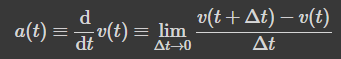

Given this definition, taking the derivative of a function represented by an evenly spaced set of time values we would simply need to divide and array derrived from a set of differences of the function divided by the time step.

`dvdt = np.diff(v)/np.diff(t)`

[`np.diff`](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) full documentation

There are some technical issues like when I take differences between values the resulting calculation yields an array that is 1 element shorter.  This is only an issue if you now want to plot the result as a function of the original time values.  You have two choices, you can plot the difference against the original time series with the first value or last value dropped or use the smoothing function described elsewhere.  The other way is to use the `numpy gradient` funciton which preserves the length.  I will assume you know how to build a model function as a function of a variable like pos(t).

[`np.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html#numpy.gradient) full documentation

In [ ]:
def derivative(fVals, tVals):
  """
  Calculate the derivative of a function represented by an array of values w.r.t.
  a set of tVals. The gradient returns the d(fVals) so all we have to do is 
  divide by d(tVals). (If the time values are equally spaced we could divide
  by Δt, the difference between any two elements but this method is more flexible)
  """
  return np.gradient(fvals) / np.gradient(tVals)

## Example
time = np.linspace(0.0, 4.0, 300) # 300 time values from 0.0 to 4.0 s
pos = 20 * time - 1/2 * 10 * time**2  # an object tossed upward

vel = derivative(pos, time)  # the velocity(t) of the object.

# APC: Numpy Trick - Smoothing Data

Sometimes you want to 'smooth' out especially noisy data.  It could be that the measurement you took has glitches (common when using a sonic range finder).  If you have a lot of points you can apply what is known as a 'rolling average' or 'smoothing function' where a new set of points is generated around the surounding values.  The bigger the window the smoother the function but the more you distort the signal.  Use with caution.

[`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve) full documentation

There is one special use case where what you might want is a set of values that lie between the values provided. For a time series where the values are evenly spaced, this tool can be useful to generate a set of time values that lie exactly between the original set.  This can be used for a new set of time values for a fintie difference operation.  

In [ ]:
# smoothing noisy data or getting the midpoint between a series of values.
# notice how the array returned has (window-1) values fewer than the input
# array.  In the default example (window=2) there is one fewer elements than
# the input: values
def moving_average(values, window=2):
    return np.convolve(values, np.ones(window), 'valid') / window

times = np.linspace(0.0, 3.0, 200)+np.random.normal(scale=0.1, size=200)  # 200  values from 0.0sec to 3.0sec with noise
newtimes = moving_average(times)  # smooth the values (note that the array is now 199 ) 


# APC: Scipy Trick - Numerical Integration

Sometimes we need to integrate a funciton.  There are two reasons for doing this: in one case we want the area under the graph of some model of collection of experimental data in which we would see as a single value, in the other we want a collection of values which represent the cumulative area under the graph of a set of values.  We could stay entirely within the `numpy` library and develop our own integrator using a tool called [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html?highlight=cumsum#numpy.cumsum) but this would be the equivalent of adding small rectangles under each point.  There are slightly more accurate ways to develop this area information using shapes like trapezoids.  We will use a toolkit from the `scipy` library where all these details have been worked out for us.

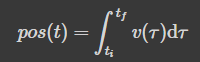

You will need to import from the `scipy` library by adding this line to your code cell
```python
from scipy import integrate  # import the integration tools from scipy
```

[`integrate.cumtrapz`](https://docs.scipy.org/doc/scipy-1.5.2/reference/generated/scipy.integrate.cumtrapz.html#scipy.integrate.cumtrapz) full documentation

In [ ]:
from scipy import integrate as integ  # import the integration tools from scipy

def integral(fVals, tVals, init=0.0):
  """
  Calculate the integral of a function represented by an array of values w.r.t.
  a set of tVals. The cumtrapz returns the ∫fVals * d(tVals) so all we have to
  do is supply the constant of integration. (Alternatively, if the time values 
  are equally spaced we can simply supply Δt, the difference between any two 
  elements.) If the consant is not supplied then it is assumed to be 0.0.
  """
  return integ.cumtrapz(fVals, x=tVals, initial=init)

## Example
time = np.arange(0.0, 4.0, 0.05)
vel = 20 - 10 * time  # an object tossed upward

pos = integral(vel, time, init=0.0)  # the pos(t) of the object tossed up from the ground.

# APC: Numpy Trick - Fitting values

Suppose you have a set of data values and want to fit them to a curve.  You want to generate a fit, obtain the parameters (slope and intercept, for  example), plot the original data and plot the fitted line for comparison.

Assumptions:
  - You have loaded the libraries under the heading 'General Library' (*you only have to do this once per notebook*)
  - you have some data with independent and dependent values...

In [ ]:
# Data obtained from tracker
times = np.array([0.000,0.071,0.143,0.214,0.286,0.357,0.429,0.500])
ypos = np.array([0.0,2.0,9.0,22.2,41.2,64.2,89.1,121.7])

# a bit of 'python trickery' to get the coeficients assigned on one line
# fit to a quadratic a*t^2 + b*t +c
(a,b,c)=np.polyfit(times, ypos, 2)
# linear fit m*t+b ... just to see how this works
#(m,b)=np.polyfit(times,ypos,1)

# print the result
print(f"A: {a:5.0f} cm/s^2  which should give a g of {2*a:5.0f} cm/s^2")

# plot the data
plt.scatter(times, ypos, c="b")

# plot the fit on the same graph
plt.plot(times, a*times**2 + b*times + c, c="c", linewidth=4, alpha=0.6)  # draw a line over which we will plot the points

# label the graph
plt.xlabel("$time[s]$")
plt.ylabel("$ypos[cm]$")
plt.grid(True)

plt.show()

# APC: Reading from a .csv file

Sometimes we take so much data that copying and pasting the contents of a data set is awkward. This is the sequence of steps needed to import the data from a comma seperated values file.

This can be complicated because other than the data being separated by commas there is no 'standard' way to format a csv file. It can be a mix of strings, numbers and other information. Fortunately there is a tool that can try to sort this out automatically.

**Pathname acquisition**
   - Get a path name to the file you want to import
       - Tap the Files tab 🗀
       - Navigate to your **file**
       - Right click and choose copy path
       - replace the example in the code with your value.

**Extracting Data**

Because csv files can be structured in a variety of ways you need to look at your file first by issuing the following command (where the filename is replaced with the filename you copied above.  *N.B. the example below uses a file that is loaded by default in your sample_data folder*
```
# prints out the first 10 lines of the csv file
! head '«filename»'
```

In [ ]:
# prints out the first 10 lines of the csv file
! head "/content/sample_data/california_housing_train.csv"  # for example

"""
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
"""

Like many csv files generated by the programs we use, the first row is often a series of titles. The data follows in ordered lists of numbers.

We need to note the following information from our csv file.
  - how many rows do we need to skip before getting to the data?  
    (the example above shows that this should be 1)
  - what columns do we want?  
    (we want longitude [**0**] and latitude[**1**] *count from 0*)
  - what is the delimiter that separates the values?  
    (because delimited files come in many flavors [commas **`,`** and tabs **`\t`**])

In [ ]:
# now that you have an idea of how the file starts you can set the
# call up correctly, skipping over the first line.
csvFile = "/content/sample_data/california_housing_train.csv"

# pull in the first two columns: 0,1, with a delimiter of ',' and skip the first line
xlat, xlog = np.loadtxt(csvFile, skiprows=1, usecols=(0,1), delimiter=",", unpack=True)

# the following line is optional in case you want to extract the titles, just grab the first line.
titl0, titl1 = np.loadtxt(csvFile, max_rows=1, usecols=(0,1), delimiter=",", dtype="str", unpack=True)

You should probably visualize the table in some way to make sure you got what you wanted.

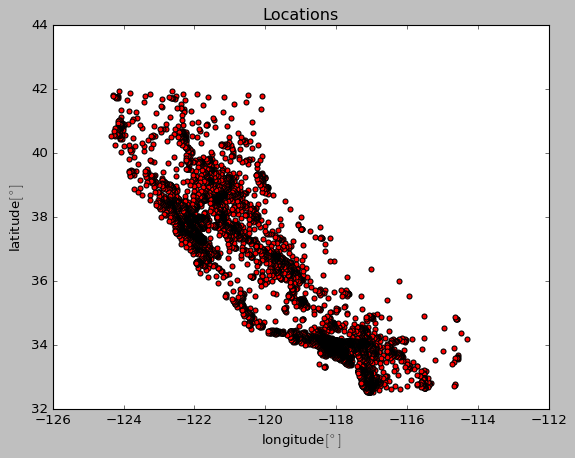

In [ ]:
## PLOT AS USUAL
plt.style.use('classic')

plt.scatter(xlat, xlog, c='r')

plt.xlabel(titl0[1:-1] + "$[^\circ]$") # [1:-1] gets rid of the leading and trailing quotes
plt.ylabel(titl1[1:-1] + "$[^\circ]$") # [1:-1] gets rid of the leading and trailing quotes
plt.title("Locations")

plt.show()

# APC: Embedding Drawing in a Text Cell


If you want to create a drawing of your own, great for diagraming and presenting FBDs. Use Google's drawing tool.  Then you can live embed your creation with 'on the fly conversion`. 
  1. Give 'everyone with the link' permission to view your drawing.
  1. Click on 'copy link' to get the URL of the drawing 
  
  (e.g. `https://docs.google.com/drawings/d/`<small>*lots-O-Characters*</small>`/edit?usp=sharing`)
  
  and paste it into one of the two the image methods...
    - for **markdown** `![wires](%url%)`
    - for **html** `<img src="%url%" align="right"/>`
    
  1. Replace the `/edit?usp=sharing` with `/export/png` or `/export/svg`
     
     (e.g. `https://docs.google.com/drawings/d/`<small>*lots-O-Characters*</small>`/export/svg`)

---
![wires](https://docs.google.com/drawings/d/1Eqyz3SCTsVwtPgZOFq0og05JKPbYK5HDMCwVmWkWxcg/export/svg)

<img alt="wires" src="https://docs.google.com/drawings/d/1Eqyz3SCTsVwtPgZOFq0og05JKPbYK5HDMCwVmWkWxcg/export/svg" align="right" width="30%">

**TRADEOFF**: Markdown will scale the image so the width matches the page, blowing your image way up to more than you intended. The html method involves some additional complexity but text can flow around your image and you can control the size.


# APC: Embedding Image directly in a Text Cell

You have an image in your google drive you want to display in a `Text Cell`.  Easily done with some lttle tricks

**Direct Embedding**

All the work 'sharing' a file can be a bit of a pain and sometimes doesn't quite work as expected.  If your image is small ($\approx$ 100$\pm$ px) then you can include it by directly pasting it into a text cell.  This can take up a large chunk of space so it is best to restrict it to a png file not much larger than 100x100 pixels and place the image all by itself inside an empty text cell. When you paste it into a text cell the image is wrapped in a standard markdown header:

`![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUh...`

So you don't have to do anything else.  You can also use the URI, `data:image/png;base64,iVBORw0KGgoAAAANSUh...`, and paste it into an 

`<img src=data:image/png;base64,iVBORw0KGgoAAAANSUh...` type presentation as well.

Here is an image directly embedded: 


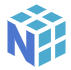


**TRADEOFF** Image stays with the document BUT editing things around the base64 rendition is difficult as even a small image takes up a lot of space within a cell.

# APC: Tables in MarkDown


We often have to present tables as steps or as numerical results.  
 > **NB:** Markdown doesn't work well in the Snippets window. To get the full effect you need to click on _**VIEW SOURCE NOTEBOOK**_

MarkDown tables are fairly easy:
  - Start with a blank line
  - The first line are the headers separated by vertical bars '|'
  - The next line establishes the column alignment for the table:
      - `:--` or `---` is left alignment
      - `:-:` is center alignment
      - `--:` is right alignment
  - Finally the rows of data or information follow.
  - every line must have the same number of vertical bars as the header row.

**Example**:

|Col1 Title|Col2 Title | Col3 Titke |
|---|:-:|--:|
| one | 1 |$1^{st}$ |
|two | 2|$2^{nd}$    |
| three |3 | $3^{rd}$ |
| four |4| $4^{th}$|

Notice how the spaces inside each cell don't count and you don't have to align the vertical bars. The alignment adjusts automatically.

# APC: Formulas in MarkDown

Communicating in physical sciences and engineering often means we switch between prose and mathematics to describe what we mean.  Markdown makes it easy to embed formulas.  Type the math between a pair of dollar signs, `$«formula code here»$`, for an 'inline' formula or double dollar signs, `$$«formula code here»\tag{lbl}$$`, for a formula centered on its own line. If it is important enough to set off on its own line you probably want to give it a label.

The typing code is drawn from $\LaTeX$ of which there is a brief but [fairly useful reference](https://www.caam.rice.edu/~heinken/latex/symbols.pdf).

You can also start by using any one of many [graphical tools](http://atomurl.net/math/) and copy the result.

You can also go to the LaTeX section of [HOWTO on Markdown](https://colab.research.google.com/drive/1QWlcJSnQsSTVvH50N_w_ko5RmCdZuLEQ#scrollTo=BwD1JZxt0phm)
 > **NB:** The LaTeX renderer doesn't run in the snippets section. To see the full extent of formula formatting click on the _**VIEW SOURCE NOTEBOOK**_ at the bottom of this entry.